In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('data/housing.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


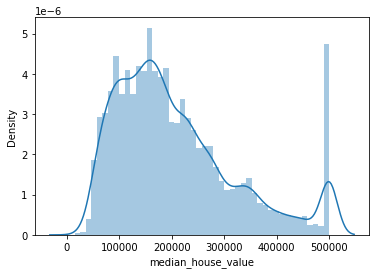

In [ ]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
sns.distplot(y)
plt.show()

In [ ]:
X = pd.concat([X, pd.get_dummies(X.ocean_proximity)], axis=1)
X = X.drop(['ocean_proximity'],axis=1)
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeRegressor(max_depth = 3, random_state=42)
d_tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
predictions = d_tree1.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 55653.73 unit.
Accuracy: 68.285 %.


In [ ]:

from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(d_tree1, feature_names = X.columns,
               out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\nh\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xec\xcf6M\x00…

Mean Absolute Error: 43405.62 unit.
Accuracy: 75.991 %.


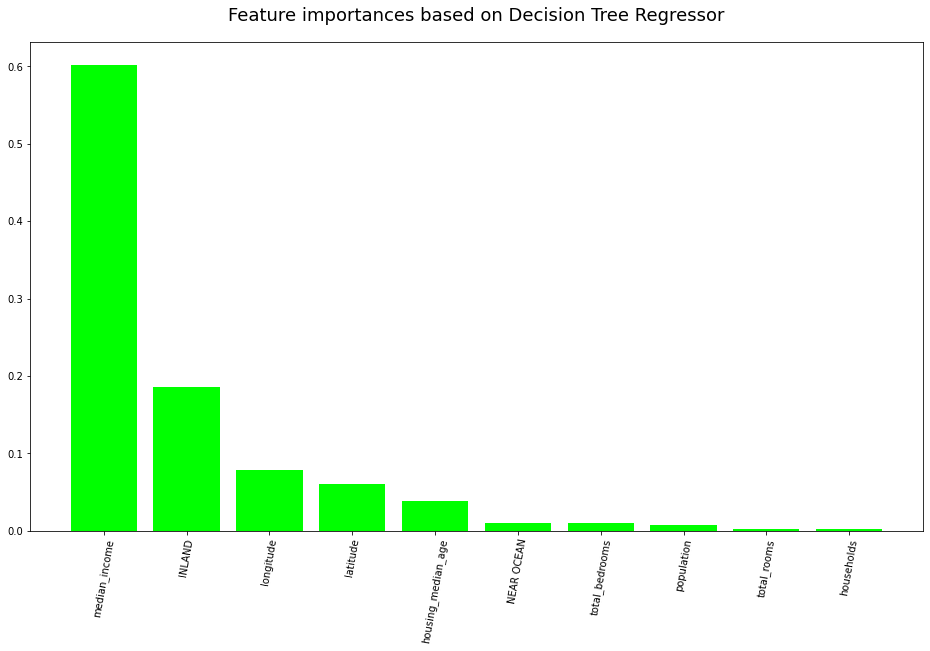

In [ ]:
d_tree2 = DecisionTreeRegressor(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
predictions = d_tree2.predict(X_test)

errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

plt.figure(figsize=(16, 9))

ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns
plt.title("Feature importances based on Decision Tree Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()


-Açıklayıcı veri analizi ve görselleştirme.

-Eksik verileri tahmin etme/veri atama.

-Kategori tipindeki verileri one-hot encoding ile nümerik formata çevirme.

-Veri setini eğitim ve test veri-setlerine ayırma.

-Modeli eğitme ve test verisi üzerinde tahmin yapma.

-Sınıflandırma başarı metriklerine bakma.

-Karar ağacını görselleştirme.

-Modelin yaptığı öznitelik sıralamasını görselleştirme.
